In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns


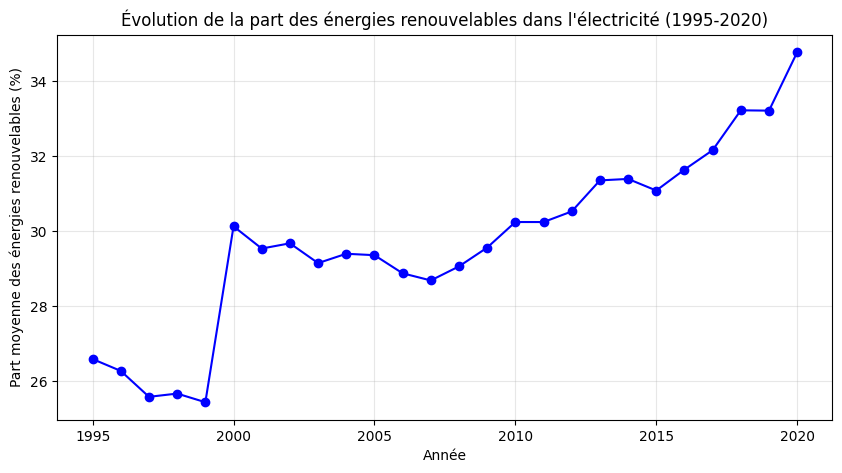

In [7]:
df = pd.read_csv('World Energy Consumption.csv')
df = df[(df['year'] >= 1995) & (df['year'] <= 2020)]
df_grouped = df.groupby('year')['renewables_share_elec'].mean()

plt.figure(figsize=(10, 5))
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-', color='blue')
plt.title('Évolution de la part des énergies renouvelables dans l\'électricité (1995-2020)')
plt.xlabel('Année')
plt.ylabel('Part moyenne des énergies renouvelables (%)')
plt.grid(alpha=0.3)
plt.show()

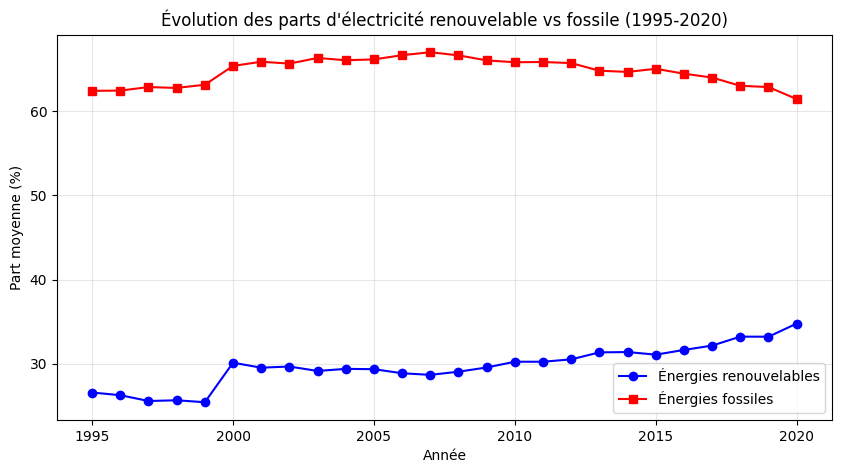

In [3]:
df_renewables = df.groupby('year')['renewables_share_elec'].mean()
df_fossil = df.groupby('year')['fossil_share_elec'].mean()

plt.figure(figsize=(10, 5))
plt.plot(df_renewables.index, df_renewables.values, marker='o', linestyle='-', color='blue', label='Énergies renouvelables')
plt.plot(df_fossil.index, df_fossil.values, marker='s', linestyle='-', color='red', label='Énergies fossiles')

plt.title('Évolution des parts d\'électricité renouvelable vs fossile (1995-2020)')
plt.xlabel('Année')
plt.ylabel('Part moyenne (%)')
plt.legend()
plt.grid(alpha=0.3)

plt.show()


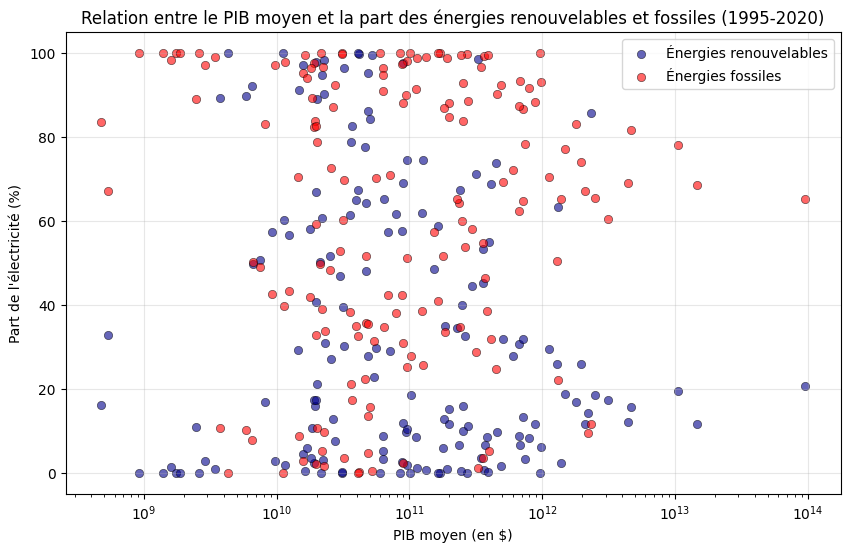

In [8]:
# Calculer le PIB moyen et la part moyenne des énergies renouvelables et non renouvelables par pays
df_avg = df.groupby('country', as_index=False).agg({
    'gdp': 'mean',
    'renewables_share_elec': 'mean',
    'fossil_share_elec': 'mean'
})

# Supprimer les valeurs aberrantes (PIB nul ou NaN)
df_avg = df_avg.dropna(subset=['gdp', 'renewables_share_elec', 'fossil_share_elec'])
df_avg = df_avg[df_avg['gdp'] > 0]

# Créer la figure
plt.figure(figsize=(10, 6))

# Énergies renouvelables (bleu)
plt.scatter(df_avg['gdp'], df_avg['renewables_share_elec'], 
            alpha=0.6, color='darkblue', edgecolors='black', linewidth=0.5, 
            label="Énergies renouvelables")

# Énergies non renouvelables (rouge)
plt.scatter(df_avg['gdp'], df_avg['fossil_share_elec'], 
            alpha=0.6, color='red', edgecolors='black', linewidth=0.5, 
            label="Énergies fossiles")

# Échelle logarithmique pour le PIB
plt.xscale('log')

# Titres et labels
plt.title('Relation entre le PIB moyen et la part des énergies renouvelables et fossiles (1995-2020)')
plt.xlabel('PIB moyen (en $)')
plt.ylabel('Part de l\'électricité (%)')
plt.grid(alpha=0.3)
plt.legend()
plt.show()


C:\Users\yvenl\AppData\Local\Temp\ipykernel_2296\2611687023.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='continent', y='renewables_share_elec', data=df, palette='Set3', linewidth=1.2)


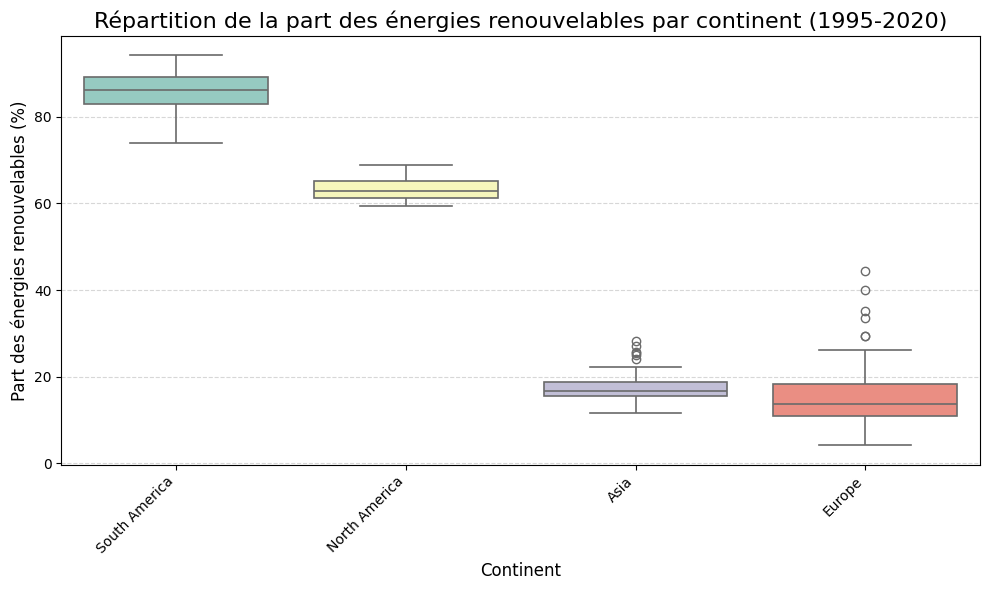

In [9]:
# Ajouter la colonne continent (si non présente, il faudra la récupérer via un autre dataset)
df['continent'] = df['country'].map({
    'USA': 'North America', 'Germany': 'Europe', 'China': 'Asia', 'India': 'Asia',
    'Brazil': 'South America', 'France': 'Europe', 'UK': 'Europe', 'Canada': 'North America'
    # Ajoute plus de pays si nécessaire
})

# Créer la figure et personnaliser le style
plt.figure(figsize=(10, 6))

# Créer un boxplot avec des couleurs plus distinctes et ajouter des bordures
sns.boxplot(x='continent', y='renewables_share_elec', data=df, palette='Set3', linewidth=1.2)

# Titre et labels
plt.title('Répartition de la part des énergies renouvelables par continent (1995-2020)', fontsize=16)
plt.xlabel('Continent', fontsize=12)
plt.ylabel('Part des énergies renouvelables (%)', fontsize=12)

# Rotation des labels de l'axe X pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right', fontsize=10)

# Ajouter une grille pour plus de lisibilité
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Afficher le graphique
plt.tight_layout()  # Ajuste les éléments pour éviter que le titre ou les labels se chevauchent
plt.show()


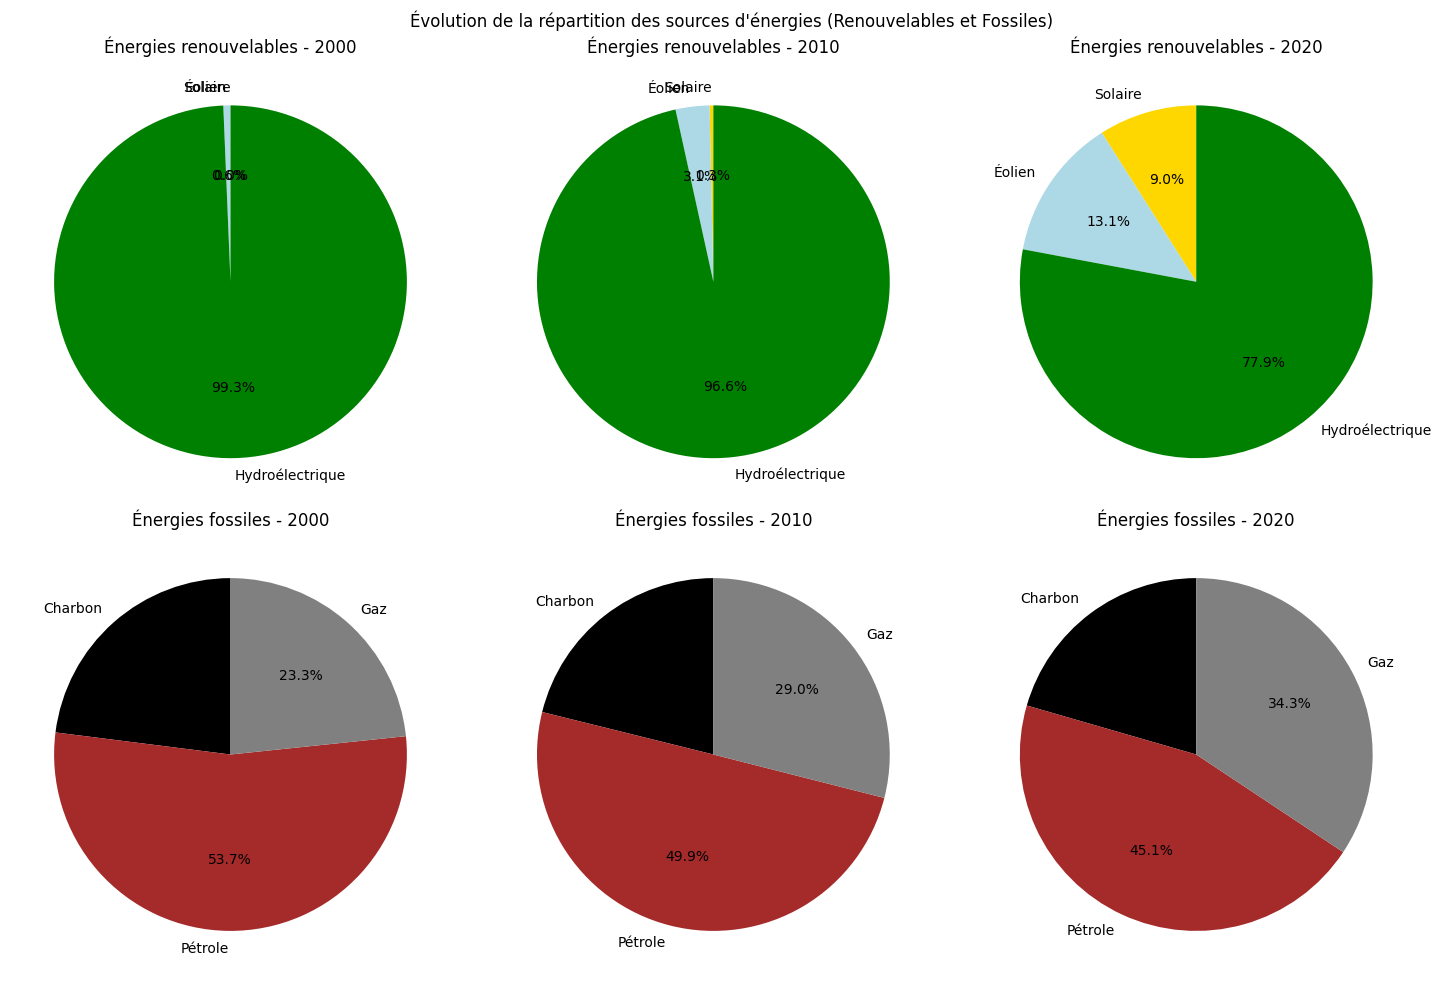

In [11]:
# Filtrer les données pour chaque année
df_2000 = df[df['year'] == 2000]
df_2010 = df[df['year'] == 2010]
df_2020 = df[df['year'] == 2020]

# Fonction pour calculer les moyennes des parts d'énergies renouvelables
def get_renewable_shares(df):
    return [
        df['solar_share_elec'].mean(),
        df['wind_share_elec'].mean(),
        df['hydro_share_elec'].mean()
    ]

# Fonction pour calculer les moyennes des parts d'énergies fossiles
def get_fossil_shares(df):
    return [
        df['coal_share_elec'].mean(),
        df['oil_share_elec'].mean(),
        df['gas_share_elec'].mean()
    ]

# Récupérer les valeurs moyennes
shares_renewable_2000 = get_renewable_shares(df_2000)
shares_renewable_2010 = get_renewable_shares(df_2010)
shares_renewable_2020 = get_renewable_shares(df_2020)

shares_fossil_2000 = get_fossil_shares(df_2000)
shares_fossil_2010 = get_fossil_shares(df_2010)
shares_fossil_2020 = get_fossil_shares(df_2020)

# Définition des sources et des couleurs
sources_renewable = ['Solaire', 'Éolien', 'Hydroélectrique']
colors_renewable = ['gold', 'lightblue', 'green']

sources_fossil = ['Charbon', 'Pétrole', 'Gaz']
colors_fossil = ['black', 'brown', 'gray']

# Création des sous-graphes
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 lignes, 3 colonnes

# Camemberts pour les énergies renouvelables
axes[0, 0].pie(shares_renewable_2000, labels=sources_renewable, autopct='%1.1f%%', startangle=90, colors=colors_renewable)
axes[0, 0].set_title("Énergies renouvelables - 2000")

axes[0, 1].pie(shares_renewable_2010, labels=sources_renewable, autopct='%1.1f%%', startangle=90, colors=colors_renewable)
axes[0, 1].set_title("Énergies renouvelables - 2010")

axes[0, 2].pie(shares_renewable_2020, labels=sources_renewable, autopct='%1.1f%%', startangle=90, colors=colors_renewable)
axes[0, 2].set_title("Énergies renouvelables - 2020")

# Camemberts pour les énergies fossiles
axes[1, 0].pie(shares_fossil_2000, labels=sources_fossil, autopct='%1.1f%%', startangle=90, colors=colors_fossil)
axes[1, 0].set_title("Énergies fossiles - 2000")

axes[1, 1].pie(shares_fossil_2010, labels=sources_fossil, autopct='%1.1f%%', startangle=90, colors=colors_fossil)
axes[1, 1].set_title("Énergies fossiles - 2010")

axes[1, 2].pie(shares_fossil_2020, labels=sources_fossil, autopct='%1.1f%%', startangle=90, colors=colors_fossil)
axes[1, 2].set_title("Énergies fossiles - 2020")

# Ajouter un titre global
plt.suptitle("Évolution de la répartition des sources d'énergies (Renouvelables et Fossiles)")

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


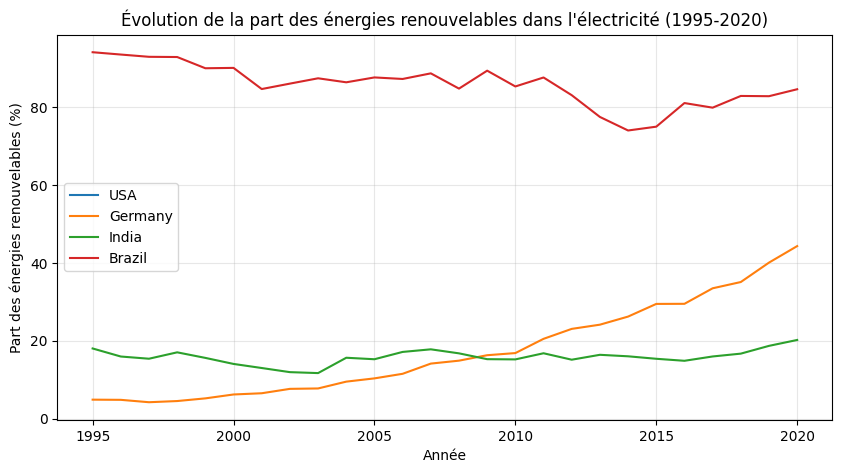

In [12]:
selected_countries = ['USA', 'Germany', 'India', 'Brazil']
df_selected = df[df['country'].isin(selected_countries)]

plt.figure(figsize=(10, 5))
for country in selected_countries:
    country_data = df_selected[df_selected['country'] == country]
    plt.plot(country_data['year'], country_data['renewables_share_elec'], label=country)

plt.title('Évolution de la part des énergies renouvelables dans l\'électricité (1995-2020)')
plt.xlabel('Année')
plt.ylabel('Part des énergies renouvelables (%)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [13]:
# Filtrer les données pour 2020
df_2020 = df[df["year"] == 2020]

# Créer une carte interactive
fig = px.choropleth(
    df,
    locations="iso_code",
    color="renewables_share_elec",
    hover_name="country",
    animation_frame="year",  # Ajoute un slider temporel !
    color_continuous_scale="YlGnBu",
    title="Évolution de la part des énergies renouvelables (1995-2020)",
    labels={'renewables_share_elec': 'Part (%)'}
)

# Sauvegarder dans un fichier HTML
fig.write_html("carte_energie.html")

# Ouvrir automatiquement la page HTML dans le navigateur
import webbrowser
webbrowser.open("carte_energie.html")


True

In [17]:
import plotly.graph_objects as go

# Charger les données
df = pd.read_csv('World Energy Consumption.csv')

# Filtrer les données à partir de 1995
df = df[df['year'] >= 1995]

# Extraire les années et les parts moyennes des différentes énergies par pays
df_avg = df.groupby(['year'], as_index=False).agg({
    'renewables_share_energy': 'mean',
    'fossil_share_energy': 'mean',
    'biofuel_share_energy': 'mean',
    'coal_share_energy': 'mean',
    'gas_share_energy': 'mean',
    'nuclear_share_energy': 'mean',
    'other_renewables_share_energy': 'mean'
})

# Créer les labels pour les différentes catégories
energy_sources = ['Renouvelables', 'Non Renouvelables', 'Bioénergie', 'Charbon', 'Gaz', 'Nucléaire', 'Autres Renouvelables']

# Organiser les données de flux par années
flows = {
    'year': df_avg['year'],
    'Renouvelables': df_avg['renewables_share_energy'],
    'Non Renouvelables': df_avg['fossil_share_energy'],
    'Bioénergie': df_avg['biofuel_share_energy'],
    'Charbon': df_avg['coal_share_energy'],
    'Gaz': df_avg['gas_share_energy'],
    'Nucléaire': df_avg['nuclear_share_energy'],
    'Autres Renouvelables': df_avg['other_renewables_share_energy']
}

# Créer le diagramme de flux alluvial
fig = go.Figure(go.Scatter(
    x=flows['year'],
    y=flows['Renouvelables'],
    mode='lines',
    name='Renouvelables',
    line=dict(color='blue', width=4)
))

fig.add_trace(go.Scatter(
    x=flows['year'],
    y=flows['Non Renouvelables'],
    mode='lines',
    name='Non Renouvelables',
    line=dict(color='red', width=4)
))

fig.add_trace(go.Scatter(
    x=flows['year'],
    y=flows['Bioénergie'],
    mode='lines',
    name='Bioénergie',
    line=dict(color='orange', width=4)
))

fig.add_trace(go.Scatter(
    x=flows['year'],
    y=flows['Charbon'],
    mode='lines',
    name='Charbon',
    line=dict(color='brown', width=4)
))

fig.add_trace(go.Scatter(
    x=flows['year'],
    y=flows['Gaz'],
    mode='lines',
    name='Gaz',
    line=dict(color='green', width=4)
))

fig.add_trace(go.Scatter(
    x=flows['year'],
    y=flows['Nucléaire'],
    mode='lines',
    name='Nucléaire',
    line=dict(color='yellow', width=4)
))

fig.add_trace(go.Scatter(
    x=flows['year'],
    y=flows['Autres Renouvelables'],
    mode='lines',
    name='Autres Renouvelables',
    line=dict(color='cyan', width=4)
))

# Ajouter les titres et les labels
fig.update_layout(
    title="Diagramme Alluvial de la Consommation d'Energie par Type (1995-2020)",
    xaxis_title="Année",
    yaxis_title="Part de Consommation d'Energie (%)",
    font=dict(size=12),
    showlegend=True,
    xaxis=dict(range=[1995, max(flows['year'])])
)

# Afficher le graphique
fig.show()
